# **Introduction to MongoDB**

---

## **What is MongoDB?**
- MongoDB is a **NoSQL database** that stores data in a **flexible, JSON-like format** called **BSON (Binary JSON)**.
- Unlike traditional SQL databases, MongoDB is:
    - **Schema-less**: Fields (columns) can vary between documents (rows).
    - **Document-Oriented**: Data is stored as individual objects (documents).
    - **Scalable and Distributed**: Supports large volumes of data with horizontal scaling.
    - **Geospatial Capabilities**: Built-in support for geospatial indexing and search.

## ** Key Concepts**
| **Concept**        | **Description**                                                                 |
|---------------------|---------------------------------------------------------------------------------|
| **Database**       | A container for collections. Equivalent to a database in SQL.                   |
| **Collection**     | A group of documents. Equivalent to a table in SQL.                             |
| **Document**       | A single record in a collection. Equivalent to a row in SQL, but schema-less.   |
| **BSON**           | Binary JSON format used by MongoDB for fast storage and retrieval.              |
| **Index**          | Data structure that improves search speed.                                      |
| **Aggregation**    | Operations to process data and return computed results.                         |

---

# Advantages of MongoDB Over Pandas

| **Feature**            | **Pandas (DataFrame)**                                     | **MongoDB (NoSQL Database)**                                                                                   |
|-------------------------|------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------|
| **Data Volume**        | Limited to RAM size (not efficient for large datasets)     | Can store millions of records, designed for large-scale data storage.                                         |
| **Persistence**        | In-memory only, lost after session ends.                   | Persistent storage — survives reboots and program termination.                                                |
| **Distributed Storage**| Not possible with Pandas alone.                            | Can be distributed across multiple servers for scalability and redundancy.                                    |
| **Data Flexibility**   | Strict schema — changing schema requires restructuring.    | Flexible schema — documents in the same collection can have different fields.                                 |
| **Real-time Access**   | Hard to achieve real-time multi-user access.               | Real-time reads and writes, supports multi-user environments seamlessly.                                      |
| **Geospatial Queries** | Requires third-party libraries and manual implementation.  | Built-in support for geospatial queries (`$near`, `$geoWithin`, etc.).                                        |
| **Concurrency Control**| Limited to single-thread operations.                       | Multi-threaded, supports parallel reads and writes with locking mechanisms.                                   |
| **Indexing & Search**  | Basic indexing, not optimized for nested structures.       | Advanced indexing capabilities, text search, geospatial indexing, and more.                                   |
| **API Integration**    | Limited to Pandas I/O methods.                             | Can integrate with real-time APIs, mobile apps, and distributed systems directly.                             |

---

# **When to Choose MongoDB Over Pandas**
- **High Data Volume:** If you are dealing with millions of records that don't fit into RAM.
- **Multi-user Access:** If you need simultaneous reads and writes by multiple clients.
- **Real-time Analytics:** If you want to support live data feeds or APIs.
- **Flexible Schema Requirements:** If your data structure is not always consistent.
- **Geospatial Data Management:** MongoDB's native geospatial indexing is far superior for spatial queries.


---

## ** What We are going to do in This Example**
Below is a summary of the operations we performed step by step:

---

### ** Connection and Setup**
We established a connection to a **local MongoDB server** and created references to:
- The **database**: `california_restaurants`
- The **collection**: `restaurants`
```python
from pymongo import MongoClient
client = MongoClient("mongodb://localhost:27017/")
db = client['california_restaurants']
collection = db['restaurants']
```

---

### ** Inserting Data**
We inserted restaurant data into MongoDB from a **Pandas DataFrame**.
```python
# Convert DataFrame to dictionary format
data_dict = data.to_dict("records")

# Insert the data into the collection
collection.insert_many(data_dict)
```

---

### ** Querying Data**
We performed different types of **queries**:
- Find documents that match a pattern:
    ```python
    results = collection.find({"address": {"$regex": "San Jose"}})
    ```
- Retrieve the **top 5 restaurants** based on ratings:
    ```python
    top_restaurants = collection.find().sort("ratings", -1).limit(5)
    ```

---

### ** Aggregation Operations**
We grouped data and sorted it:
```python
pipeline = [
    {"$group": {"_id": "$Cuisine", "count": {"$sum": 1}}},
    {"$sort": {"count": -1}}
]
cuisine_counts = list(collection.aggregate(pipeline))
```

---

### ** Indexing**
We created indexes to **speed up searches**:
```python
collection.create_index([("address", "text")])
collection.create_index([("Cuisine", 1)])
```

---

### ** Updating Data**
We updated the rating of a specific restaurant:
```python
collection.update_one({"name": "Applebee's Tracy"}, {"$set": {"ratings": 5}})
```

---

### ** Deleting Data**
We deleted single or multiple documents:
- Delete a single restaurant:
    ```python
    collection.delete_one({"name": "Patrick Molloy's Sports Pub"})
    ```
- Delete all documents:
    ```python
    collection.delete_many({})
    ```

---

## ** Summary**
- MongoDB allows **flexible schemas**, which makes it ideal for unstructured data.
- It supports **powerful queries** that can filter, sort, and group data easily.
- **Indexing** improves performance for read operations.
- **CRUD operations** (Create, Read, Update, Delete) are straightforward and efficient.
- **Aggregation** pipelines enable complex data transformations directly in the database.

---

In [1]:
import pandas as pd

# Load the data from the provided path
file_path = 'rest_data_ca.pkl'
data = pd.read_pickle(file_path)

# Display the first few records to understand the structure
data.head()

,Cuisine,address,name,postalCode,Tag,ratings
0,Fast Food,925 Blossom Hill Road Oakridge Mall,Buca Di Beppo - San Jose - Oakridge,95123,Food,4
1,Fast Food,26900 Newport Rd,Giovanni's Pizza and Pasta,92584,Food,3
2,Fast Food,3060 Naglee Rd,Applebee's Tracy,95304,Food,3
3,Fast Food,50a,Patrick Molloy's Sports Pub,90254,Food,3
4,Fast Food,555 Soquel Ave,Ristorante Italiano,95062,Food,4


In [2]:
#!pip install pymongo

In [3]:
from pymongo import MongoClient

# Connect to MongoDB (make sure your MongoDB server is running locally or adjust the URI if using Atlas)
client = MongoClient("mongodb://localhost:27017/")

In [4]:
# Create or connect to the database and collection
db = client['california_restaurants']
collection = db ['restaurants']

In [5]:
#Step 3: Import the Dataset

In [6]:
import pandas as pd

# Load the dataset
data = pd.read_pickle('rest_data_ca.pkl')

# Convert DataFrame to dictionary format for MongoDB
data_dict = data.to_dict("records")

# Insert into the collection
collection.insert_many(data_dict)

print("Data imported successfully!")

Data imported successfully!


# **Summary**
| **Step**             | **Description**                                           |
|-----------------------|-----------------------------------------------------------|
| **Find Query**       | Searches for documents where the address contains "San Jose". |
| **$regex**           | A MongoDB operator that performs pattern matching.       |
| **Loop Through Results** | Iterates over all matching documents.                 |
| **Print Each Record** | Displays each document's data.                          |


In [7]:
results = collection.find({"address": {"$regex": "San Jose"}})
for restaurant in results:
    print(restaurant)

{'_id': ObjectId('681d5dc028a6f380be6ef3da'), 'Cuisine': 'All', 'address': '2257 San Jose Ave', 'name': 'Crazy Pepper', 'postalCode': '94112', 'Tag': 'Food', 'ratings': 3}
{'_id': ObjectId('681d5dc028a6f380be6f02dd'), 'Cuisine': 'All', 'address': '1818 San Jose Avenue', 'name': 'Tasty Coffee', 'postalCode': '94112', 'Tag': 'Food', 'ratings': 3}
{'_id': ObjectId('681d677977c2d227f3dfa119'), 'Cuisine': 'All', 'address': '2257 San Jose Ave', 'name': 'Crazy Pepper', 'postalCode': '94112', 'Tag': 'Food', 'ratings': 3}
{'_id': ObjectId('681d677977c2d227f3dfb01c'), 'Cuisine': 'All', 'address': '1818 San Jose Avenue', 'name': 'Tasty Coffee', 'postalCode': '94112', 'Tag': 'Food', 'ratings': 3}


In [8]:
# Collect results into a list
results_list = list(collection.find({"address": {"$regex": "San Jose"}}))
# Convert the list to a DataFrame
df = pd.DataFrame(results_list)

# Display the DataFrame
df

,_id,Cuisine,address,name,postalCode,Tag,ratings
0,681d5dc028a6f380be6ef3da,All,2257 San Jose Ave,Crazy Pepper,94112,Food,3
1,681d5dc028a6f380be6f02dd,All,1818 San Jose Avenue,Tasty Coffee,94112,Food,3
2,681d677977c2d227f3dfa119,All,2257 San Jose Ave,Crazy Pepper,94112,Food,3
3,681d677977c2d227f3dfb01c,All,1818 San Jose Avenue,Tasty Coffee,94112,Food,3


In [9]:
#Optional: Drop the _id Column
# Drop the _id column
df = df.drop(columns=['_id'])

# Display the DataFrame again
df

,Cuisine,address,name,postalCode,Tag,ratings
0,All,2257 San Jose Ave,Crazy Pepper,94112,Food,3
1,All,1818 San Jose Avenue,Tasty Coffee,94112,Food,3
2,All,2257 San Jose Ave,Crazy Pepper,94112,Food,3
3,All,1818 San Jose Avenue,Tasty Coffee,94112,Food,3


Counting Documents in MongoDB

In [10]:
fast_food_count = collection.count_documents({"Cuisine": "Fast Food"})
print(f"Total Fast Food Restaurants: {fast_food_count}")

Total Fast Food Restaurants: 127


# **Finding Top Restaurants in MongoDB**

---

## ** Querying the Database**
```python
top_restaurants = collection.find().sort("ratings", -1).limit(5)
```
- This line is responsible for **querying the MongoDB collection** and fetching the top 5 restaurants based on their ratings.
- The code is a **method chain** with three main components:
    1. `find()`: Fetches all documents from the collection.
    2. `sort("ratings", -1)`: Sorts the documents in **descending order** (`-1`) based on the `"ratings"` field.
    3. `limit(5)`: Limits the result set to **5 documents only**.

---

## ** Summary**
| **Step**             | **Description**                                               |
|-----------------------|--------------------------------------------------------------|
| **find()**           | Fetches all documents from the collection.                   |
| **sort()**           | Sorts documents by a specified field (`"ratings"` in this case). |
| **limit()**          | Limits the number of results returned.                       |
| **Loop and Print**   | Iterates through the results and displays each document.     |

In [11]:
top_restaurants = collection.find().sort("ratings", -1).limit(5)
for restaurant in top_restaurants:
    print(restaurant)

{'_id': ObjectId('681d5dc028a6f380be6e3e7b'), 'Cuisine': 'Fast Food', 'address': '3060 Naglee Rd', 'name': "Applebee's Tracy", 'postalCode': '95304', 'Tag': 'Food', 'ratings': 5}
{'_id': ObjectId('681d5dc028a6f380be6e3e80'), 'Cuisine': 'Fast Food', 'address': '1640 Camino Del Rio N', 'name': 'Tilted Kilt Mission Valley', 'postalCode': '92108', 'Tag': 'Food', 'ratings': 4}
{'_id': ObjectId('681d5dc028a6f380be6e3e7f'), 'Cuisine': 'Fast Food', 'address': '9822 Libra Ave', 'name': 'Milanos Pizza', 'postalCode': '95827', 'Tag': 'Food', 'ratings': 4}
{'_id': ObjectId('681d5dc028a6f380be6e3e79'), 'Cuisine': 'Fast Food', 'address': '925 Blossom Hill Road Oakridge Mall', 'name': 'Buca Di Beppo - San Jose - Oakridge', 'postalCode': '95123', 'Tag': 'Food', 'ratings': 4}
{'_id': ObjectId('681d5dc028a6f380be6e3e7d'), 'Cuisine': 'Fast Food', 'address': '555 Soquel Ave', 'name': 'Ristorante Italiano', 'postalCode': '95062', 'Tag': 'Food', 'ratings': 4}


In [12]:
# Execute the query and get the top restaurants
top_restaurants = collection.find().sort("ratings", -1).limit(5)

# Convert the cursor to a list of dictionaries
top_restaurants_list = list(top_restaurants)

# Create a DataFrame, excluding the `_id` column for readability
df = pd.DataFrame(top_restaurants_list).drop(columns=['_id'])

# Display the DataFrame
df

,Cuisine,address,name,postalCode,Tag,ratings
0,Fast Food,3060 Naglee Rd,Applebee's Tracy,95304,Food,5
1,Fast Food,1640 Camino Del Rio N,Tilted Kilt Mission Valley,92108,Food,4
2,Fast Food,9822 Libra Ave,Milanos Pizza,95827,Food,4
3,Fast Food,925 Blossom Hill Road Oakridge Mall,Buca Di Beppo - San Jose - Oakridge,95123,Food,4
4,Fast Food,555 Soquel Ave,Ristorante Italiano,95062,Food,4


Step 5: Aggregation Queries

5.1 Count Restaurants by Cuisine

# **MongoDB Aggregation Pipeline - Grouping and Sorting**

---

## ** Understanding the Aggregation Pipeline**
The aggregation pipeline in MongoDB allows you to **process data records** and return computed results. 
It works similarly to `GROUP BY` in SQL with more flexibility.

```python
pipeline = [
    {"$group": {"_id": "$Cuisine", "count": {"$sum": 1}}},
    {"$sort": {"count": -1}}
]
```

---

### ** Explanation**
- The `pipeline` is a list of **stages** that process data in sequence.
- Each stage transforms the data and passes it to the next stage.

---

# **MongoDB Aggregation Pipeline - Grouping and Sorting**

---

## ** Understanding the Aggregation Pipeline**
The aggregation pipeline in MongoDB allows you to **process data records** and return computed results. 
It works similarly to `GROUP BY` in SQL with more flexibility.

```python
pipeline = [
    {"$group": {"_id": "$Cuisine", "count": {"$sum": 1}}},
    {"$sort": {"count": -1}}
]
```

---

### ** Explanation**
- The `pipeline` is a list of **stages** that process data in sequence.
- Each stage transforms the data and passes it to the next stage.

---

### ** Stage 1: $group**
```python
{"$group": {"_id": "$Cuisine", "count": {"$sum": 1}}}
```
- `"$group"`: This stage groups documents by the specified field.
- `"_id": "$Cuisine"`:
    - MongoDB uses `_id` as the identifier for each group.
    - `$Cuisine` specifies that the documents should be grouped by their `Cuisine` value.
- `"count": {"$sum": 1}`:
    - This creates a new field named `count` and increments it by `1` for every document in the group.
    - It effectively counts the number of documents for each cuisine type.

#### **Example:**  
If your collection has:
- 10 records with `"Cuisine": "Fast Food"`,
- 5 records with `"Cuisine": "Italian"`,
- 3 records with `"Cuisine": "Mexican"`,  

The result of `$group` would be:
```
{"_id": "Fast Food", "count": 10}
{"_id": "Italian", "count": 5}
{"_id": "Mexican", "count": 3}
```

---

### ** Stage 2: $sort**
```python
{"$sort": {"count": -1}}
```
- `"$sort"`: This stage sorts the documents.
- `"count": -1`:
    - `-1` means **descending order**.
    - It sorts cuisines from the most popular to the least popular.

---

## ** Executing the Aggregation Pipeline**
```python
cuisine_counts = list(collection.aggregate(pipeline))
```
- `collection.aggregate(pipeline)`: Executes the pipeline on the collection.
- `list(...)`: Converts the result into a list of dictionaries for easy access.

---

## ** Example Output**
```
[{'_id': 'Fast Food', 'count': 20},
 {'_id': 'Mexican', 'count': 15},
 {'_id': 'Italian', 'count': 10}]
```

---

## **Summary**
| **Step**             | **Description**                                                     |

|-----------------------|--------------------------------------------------------------------|

| **$group**           | Groups documents by the field (`Cuisine`) and counts each group.    |

| **$sort**            | Sorts the grouped documents by the count in descending order.       |

| **aggregate()**      | Executes the pipeline and returns the transformed data.             |

| **list()**           | Converts the aggregation cursor to a list of dictionaries.          |


In [13]:
pipeline = [
    {"$group": {"_id": "$Cuisine", "count": {"$sum": 1}}},
    {"$sort": {"count": -1}}
]
cuisine_counts = list(collection.aggregate(pipeline))
cuisine_counts

[{'_id': 'All', 'count': 95702},
 {'_id': 'Mexican', 'count': 9060},
 {'_id': 'Fast Food', 'count': 127},
 {'_id': 'Veg', 'count': 64}]

In [14]:
pipeline = [
    {"$group": {"_id": "$Cuisine", "average_rating": {"$avg": "$ratings"}}},
    {"$sort": {"average_rating": -1}}
]
average_ratings = list(collection.aggregate(pipeline))
average_ratings

[{'_id': 'Fast Food', 'average_rating': 3.5354330708661417},
 {'_id': 'All', 'average_rating': 3.504106497251886},
 {'_id': 'Mexican', 'average_rating': 3.4984547461368654},
 {'_id': 'Veg', 'average_rating': 3.46875}]

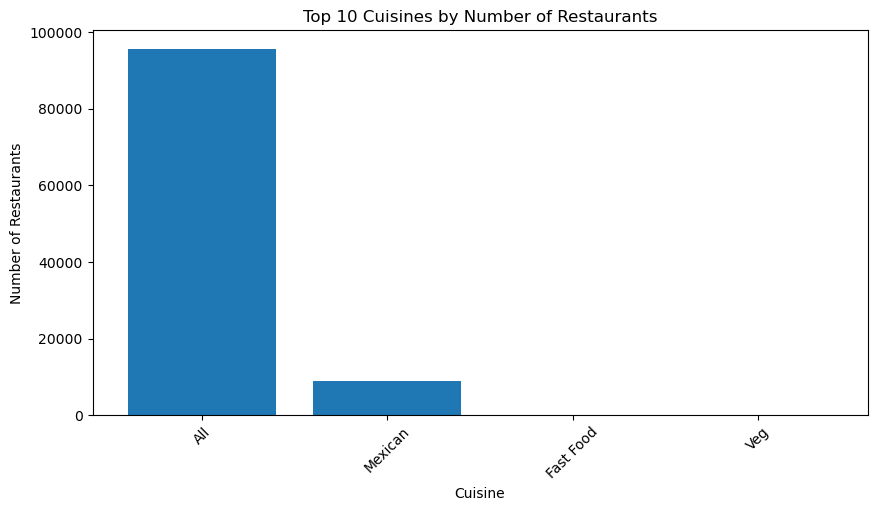

In [15]:
import matplotlib.pyplot as plt

# Plot the number of restaurants by Cuisine
labels = [x['_id'] for x in cuisine_counts][:10]
values = [x['count'] for x in cuisine_counts][:10]

plt.figure(figsize=(10, 5))
plt.bar(labels, values)
plt.title("Top 10 Cuisines by Number of Restaurants")
plt.xlabel("Cuisine")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.show()

# **Updating a Document in MongoDB**

---

## ** Updating a Document**
```python
collection.update_one({"name": "Applebee's Tracy"}, {"$set": {"ratings": 5}})
```

---

### ** Explanation**
- `collection.update_one()` is a method used to **update a single document** in the MongoDB collection.
- It takes two main arguments:
    1. The **filter condition** to find the document you want to update.
    2. The **update operation** specifying the changes to apply.

---

### ** 1. The Filter Condition**
```python
{"name": "Applebee's Tracy"}
```
- This is the **query filter**.
- It searches the collection for a document where the `"name"` field matches `"Applebee's Tracy"`.
- If there are multiple documents with the same name, **only the first match** will be updated because we are using `update_one`.

---

### ** 2. The Update Operation**
```python
{"$set": {"ratings": 5}}
```
- This is the **update instruction**.
- `"$set"` is a MongoDB operator that **modifies the value** of a field.
- In this case, the field `"ratings"` is updated to the value `5`.

---

### ** Other Update Operations**
| **Operator** | **Description**                                      | **Example**                                    |
|--------------|------------------------------------------------------|------------------------------------------------|

| **$set**    | Sets the value of a specified field.                  | `{"$set": {"ratings": 5}}`                     |

| **$inc**    | Increments the value of a field by a specified amount.| `{"$inc": {"ratings": 1}}`                     |

| **$unset**  | Removes a specified field from the document.          | `{"$unset": {"ratings": ""}}`                  |

| **$rename** | Renames a specified field.                            | `{"$rename": {"ratings": "reviewScore"}}`      |

---

## ** Displaying the Result**
```python
print("Rating updated successfully!")
```
- This simply prints a confirmation message to let you know the operation was successful.

---

In [16]:
collection.update_one({"name": "Applebee's Tracy"}, {"$set": {"ratings": 5}})
print("Rating updated successfully!")

Rating updated successfully!


In [17]:
collection.delete_one({"name": "Patrick Molloy's Sports Pub"})
print("Restaurant deleted successfully!")

Restaurant deleted successfully!


## ** Summary**
| **Step**             | **Description**                                                   |
|-----------------------|------------------------------------------------------------------|
| **delete_many()**    | Deletes **all documents** that match the filter. If the filter is empty, it deletes **everything**. |
| **Filter Condition** | The empty dictionary `{}` means all documents are selected.      |
| **Print Statement**  | Displays a success message to confirm the operation.             |


In [18]:
collection.delete_many({})
print("Collection cleared!")

Collection cleared!
